In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Practice/Unsupervised project/bank_transactions.csv')
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
df.shape

(2512, 16)

In [ ]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [ ]:
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51,Engineer,86,1,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55,Doctor,120,1,1021.88,2024-11-04 08:06:32


In [ ]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [ ]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
print(missing_data)

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
TransactionID,2512
AccountID,495
TransactionAmount,2455
TransactionDate,2512
TransactionType,2
Location,43
DeviceID,681
IP Address,592
MerchantID,100
Channel,3


In [ ]:
pip install summarytools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00


In [ ]:
from summarytools import dfSummary

In [ ]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,TransactionID[object],1. TX0024962. TX0024953. TX0024944. TX0024935. TX0024926. TX0024917. TX0024908. TX0024899. TX00248810. TX00248711. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)2,502 (99.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA0JJREFUeJzt3MFpG2EURtE3QiT2RkIIVELSg4rINh2riDRhpEXieOMsgkvIHZicU8G/uPAQzKfl/f19oLBb+wH8P8RGRmxkxEZGbGTERkZsZMRGRmxkxEZmtyzL12VZntZ+CNu3m5kvM/N57Yewfc4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZHZzcyPmfm99kPYvsW/GFFxRsmIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MiIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZJxRMmIjY11FxrqKjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJSM2MmIjY11FxrqKjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbGuoqMdRUZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJbPMzPPMfFr7IWze2/58Pn87HA6ntV/Ctj0ej5f94XA4Xa/XX8fj8XXtB7FN9/v96Xa7nfYzM8fj8fVyufxc+1Fs2rMfCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGT2M38/AVn7IWzXR1/L+Xz+7uNJ/rXH4/His3Aqb9ZVZPxAICM2MmIjIzYyYiMjNjJiIyM2MmIj8wdFqVdsnnPGyQAAAABJRU5ErkJggg=="">",0(0.0%)
2,AccountID[object],1. AC004602. AC002023. AC003624. AC003635. AC004806. AC004567. AC002578. AC002259. AC0030410. AC0021911. other,"12 (0.5%)12 (0.5%)12 (0.5%)12 (0.5%)11 (0.4%)11 (0.4%)11 (0.4%)11 (0.4%)11 (0.4%)10 (0.4%)2,399 (95.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA31JREFUeJzt3MFqE1EAhtGbEordTAiBPEweog/rQ+RtQsgsbOkmLowrTRWsXzCesxLczOJjMl7u7+J8Pg8oPNz6Afh/iI2M2MiIjYzYyIiNjNjIiI2M2MgsxhhPY4xxPp9fbvws3LnlZrN5HmOMxWLxWXD8TQ/TNK2naVqPMR5v/TDcN99sZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZmOc/z8fLnt5s+CXfPBoHMwn+ZRcWbjYx1FRnrKjKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxlvNjIGL2QMXsg4+iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsa1cDIGL2R8s5HxM0rGuoqMdRUZ32xkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSsq8i4Fk7GuoqMNxsZgxcyBi9kHH2QERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCHjWjgZgxcy3mxkDF7IGLyQcfRBRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSsq8jYIJCxriLjzUbGuoqMdRUZRx9kxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsi4Fk7G4IWMNxsZgxcyBi9kHH2QERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCHjWjgZgxcyvtnI+BklY11FxrqKjG82MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkXAsnY11FxpuNjMELGYMXMo4+yIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQcS2cjMELme9vNlfC+Shv134ll5vN5vmyQYA/Ns/z8dp4ajlN03q3272sVqvXWzwc9+N0On3a7/frw+HwOMb4MbYxxlitVq/b7fZL/nTco6drf+GcjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcxyjG9XQ279IPz7ftXRcp7n436/X493robA77oMqH46nnItnI929Vq4wQsZ/0AgIzYyYiMjNjJiIyM2MmIjIzYyYiPzFZR1ECdHXRmlAAAAAElFTkSuQmCC"">",0(0.0%)
3,TransactionAmount[float64],Mean (sd) : 297.6 (291.9)min < med < max:0.3 < 211.1 < 1919.1IQR (CV) : 332.6 (1.0),"2,455 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmRJREFUeJzt3DFv2kAYh/H3CkEGWgMigs0rWwdGln6DftiuHSPBzLdASFYA4YaAkLuUqlLSAHeh9f/0/GZ8ZnhkdMj3urIsDai6D//7CwCXqJ/7gHOuaWYNz/X3ZVk+eV4L/PZmqM65Zr/f/5qmac9n8c1m8+ic+0asCHXuidpI07Q3mUyeOp3O7pqF1+t1Mp1Oe3meN8yMUBHk7E+/mVmn09kNBoMfHus3Pa4BXmAzBQmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECg

In [ ]:
df.dtypes

,0
TransactionID,object
AccountID,object
TransactionAmount,float64
TransactionDate,object
TransactionType,object
Location,object
DeviceID,object
IP Address,object
MerchantID,object
Channel,object


Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

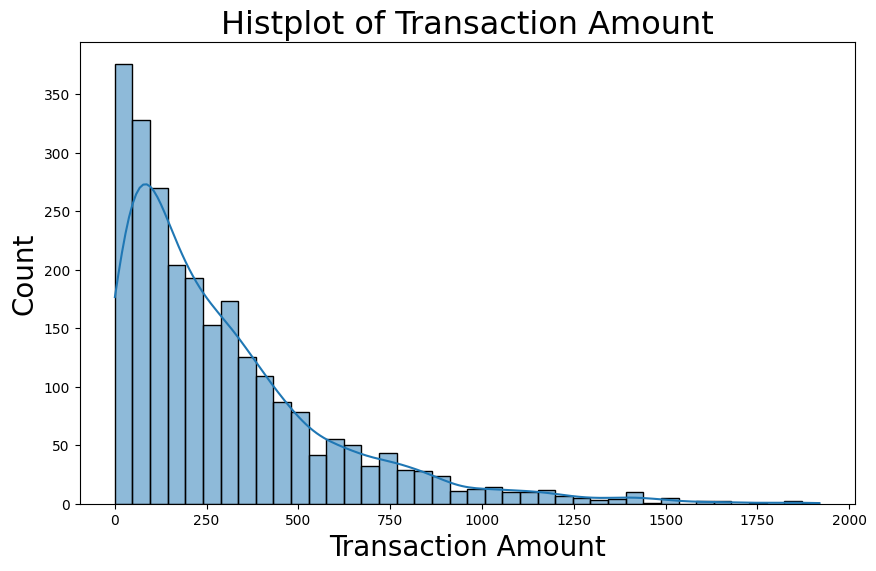

In [ ]:
plt.figure(figsize=(10,6))

plt.xlabel("Transaction Amount", fontsize=20)
plt.ylabel("Count", fontsize=20)

plt.title("Histplot of Transaction Amount", fontsize=23)

sns.histplot(data=df, x="TransactionAmount", kde=True)

plt.show()

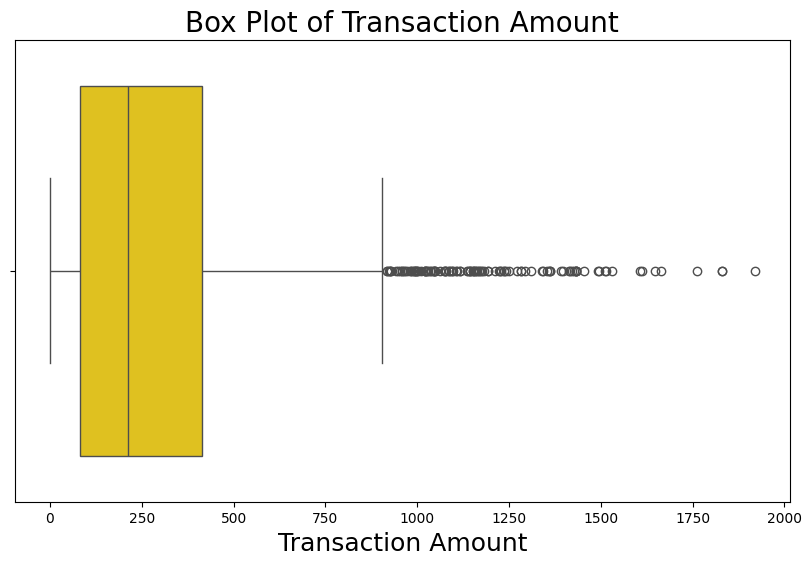

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['TransactionAmount'], color='gold')

plt.title('Box Plot of Transaction Amount', fontsize=20)
plt.xlabel('Transaction Amount', fontsize=18)

plt.show()

In [ ]:
debitcard_counts = df[df['TransactionType']=='Debit']['TransactionType'].count()
creditcard_counts = df[df['TransactionType']=='Credit']['TransactionType'].count()

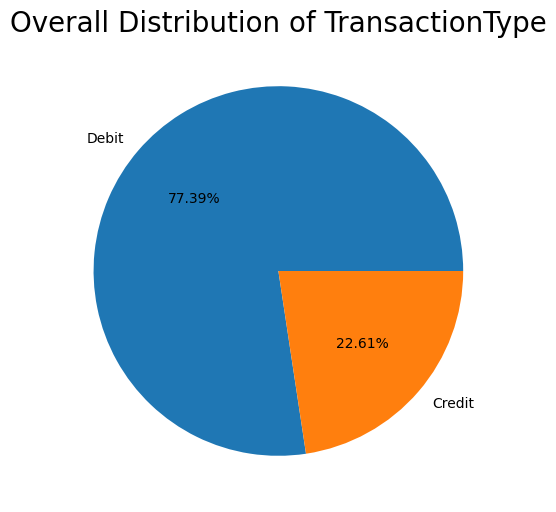

In [ ]:
plt.figure(figsize=(10,6))

index_values = [debitcard_counts, creditcard_counts]
index_labels = ['Debit', 'Credit']

plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Distribution of TransactionType', fontsize=20)

plt.show()

In [ ]:
branch_counts = df[df['Channel']=='Branch']['Channel'].count()
atm_counts = df[df['Channel']=='ATM']['Channel'].count()
online_counts = df[df['Channel']=='Online']['Channel'].count()

branch_counts, atm_counts, online_counts

(np.int64(868), np.int64(833), np.int64(811))

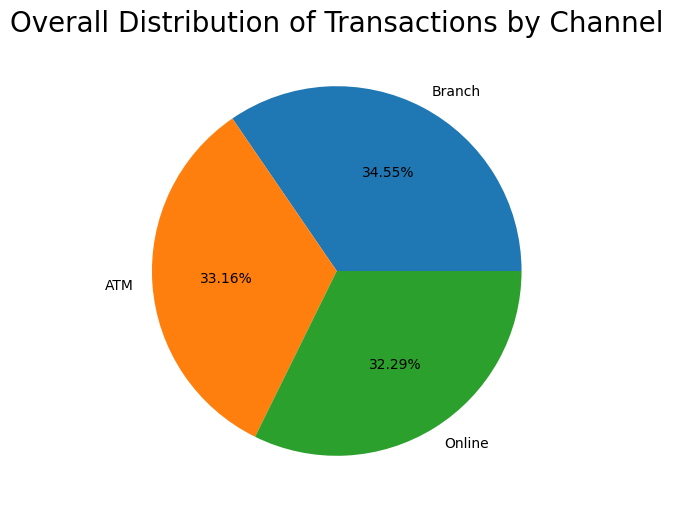

In [ ]:
plt.figure(figsize=(10, 6))

index_values = [branch_counts, atm_counts, online_counts]
index_labels = ['Branch', 'ATM', 'Online']

plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Distribution of Transactions by Channel', fontsize=20)

plt.show()

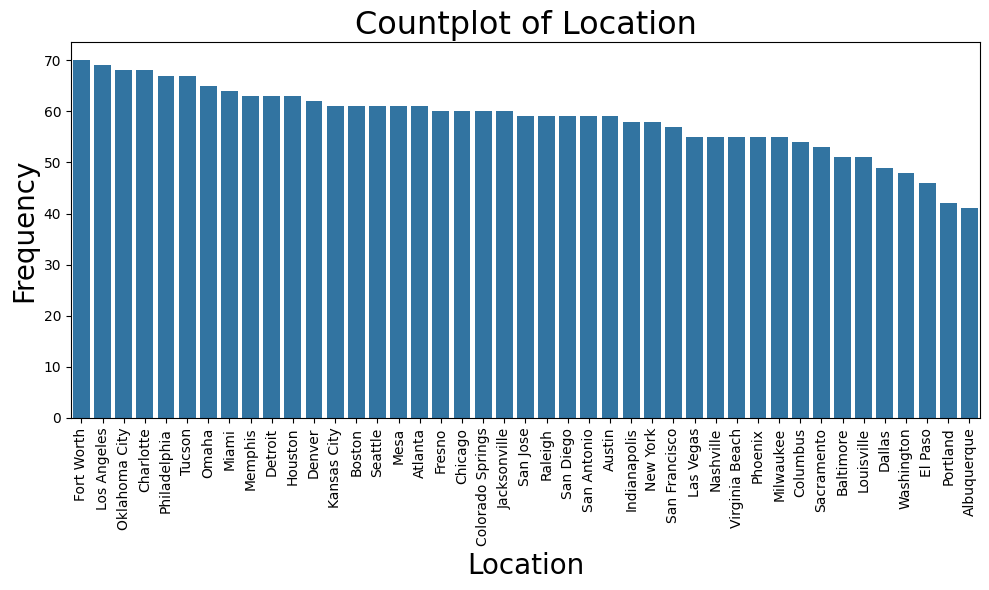

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

order = df['Location'].value_counts().index

plt.figure(figsize=(10, 6))

plt.xlabel("Location", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.title("Countplot of Location", fontsize=23)

sns.countplot(data=df, x="Location", order=order)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
from datetime import datetime

TransactionDay
2023-01-02    19
2023-01-03     9
2023-01-04     4
2023-01-05     8
2023-01-06     7
              ..
2023-12-26     5
2023-12-27     4
2023-12-28     7
2023-12-29     9
2024-01-01    13
Length: 261, dtype: int64


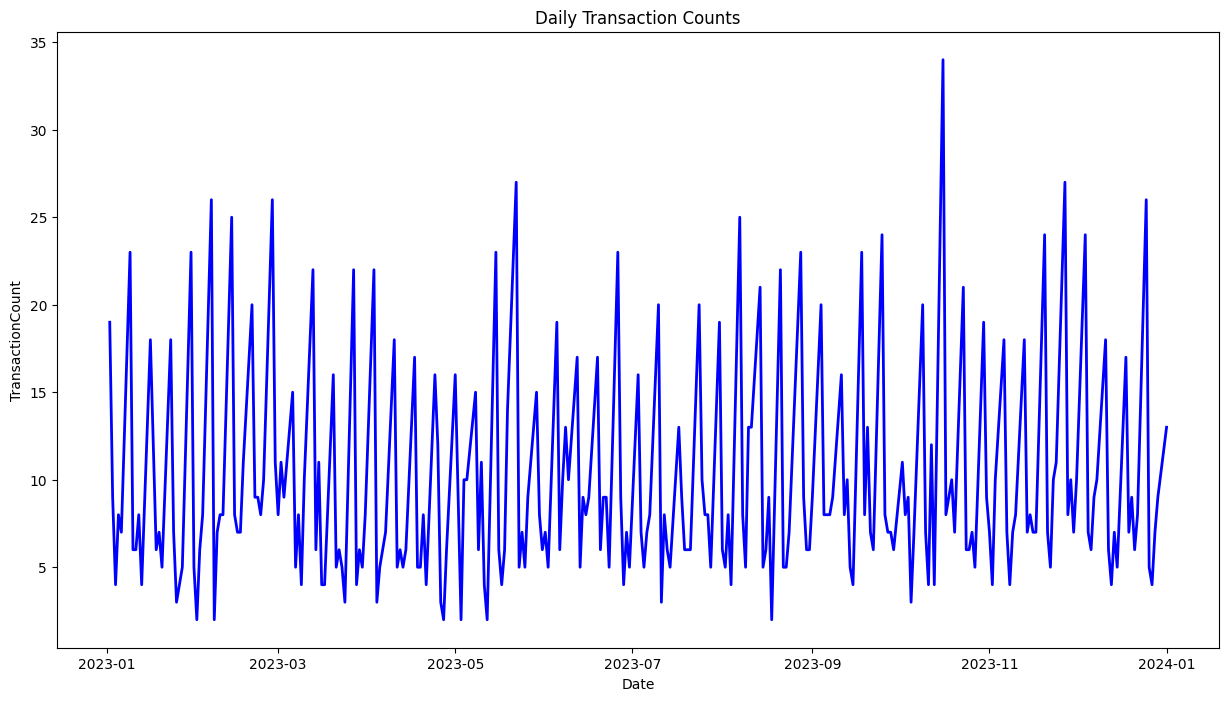

In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionDay'] = df['TransactionDate'].dt.date
daily_counts = df.groupby('TransactionDay').size()
print(daily_counts)
plt.figure(figsize=(15,8))
daily_counts.plot(title='Daily Transaction Counts', color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('TransactionCount')
plt.show()

0         Tuesday
1         Tuesday
2          Monday
3          Friday
4          Monday
          ...    
2507    Wednesday
2508    Wednesday
2509       Monday
2510       Friday
2511      Tuesday
Name: DayOfWeek, Length: 2512, dtype: object


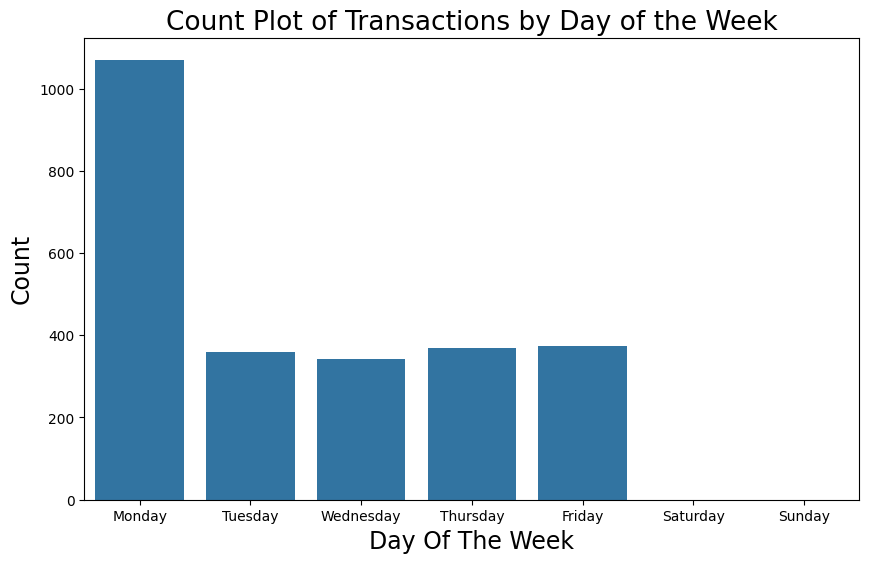

In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()
print(df['DayOfWeek'])
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Count Plot of Transactions by Day of the Week', fontsize=19)
plt.xlabel('Day Of The Week', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.show()

<ipython-input-28-33c3a3020c1b>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Hour', kde=True, palette='plasma') #optionally you can set bins=24


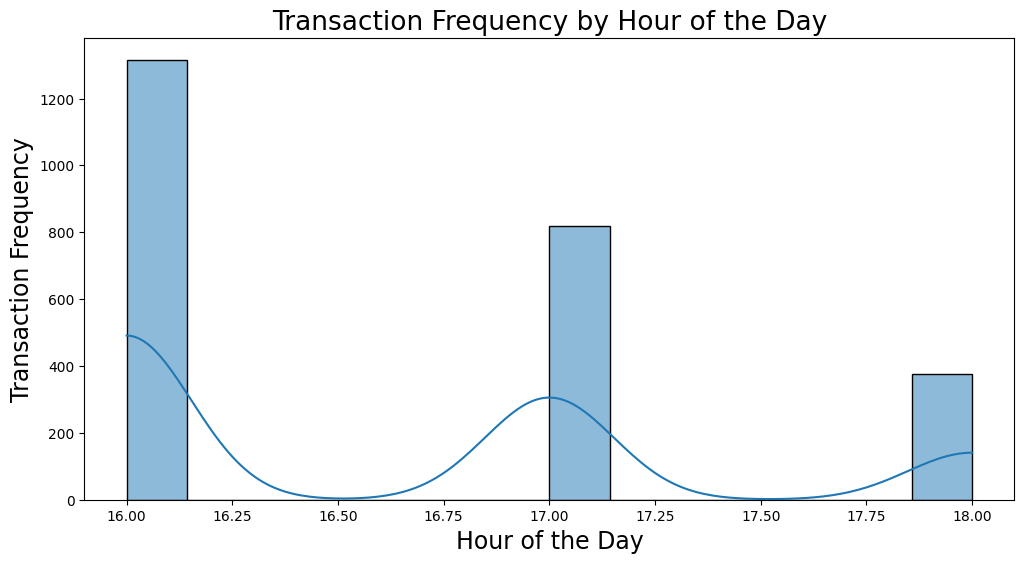

In [ ]:
df['Hour'] = df['TransactionDate'].dt.hour
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Hour', kde=True, palette='plasma')
plt.title('Transaction Frequency by Hour of the Day', fontsize=19)
plt.xlabel('Hour of the Day', fontsize=17)
plt.ylabel('Transaction Frequency', fontsize=17)
plt.show()

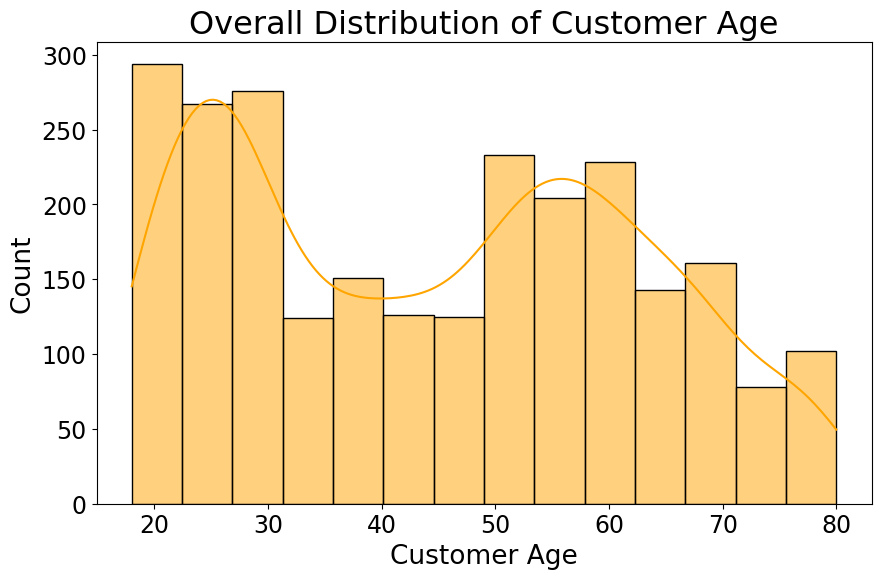

In [ ]:
plt.figure(figsize=(10,6))

plt.xlabel('Customer Age', fontsize=19)
plt.ylabel('Count', fontsize=19)

plt.yticks(fontsize=17)
plt.xticks(fontsize=17)

plt.title('Overall Distribution of Customer Age', fontsize=23)

sns.histplot(data = df, x=df['CustomerAge'], kde=True, color='orange')

plt.show()

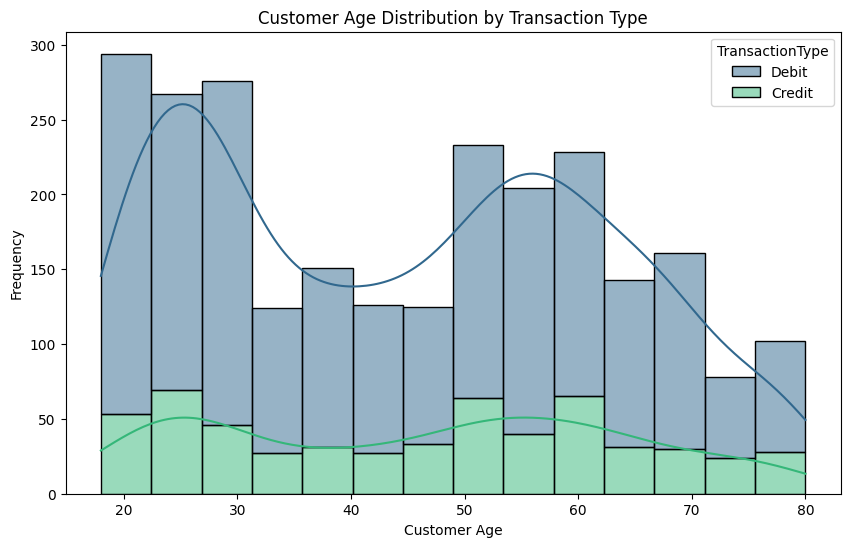

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='CustomerAge', hue='TransactionType', multiple='stack', palette='viridis', kde=True)
plt.title('Customer Age Distribution by Transaction Type')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
customer_occupation_counts = df['CustomerOccupation'].value_counts()
customer_occupation_counts

,count
CustomerOccupation,
Student,657
Doctor,631
Engineer,625
Retired,599


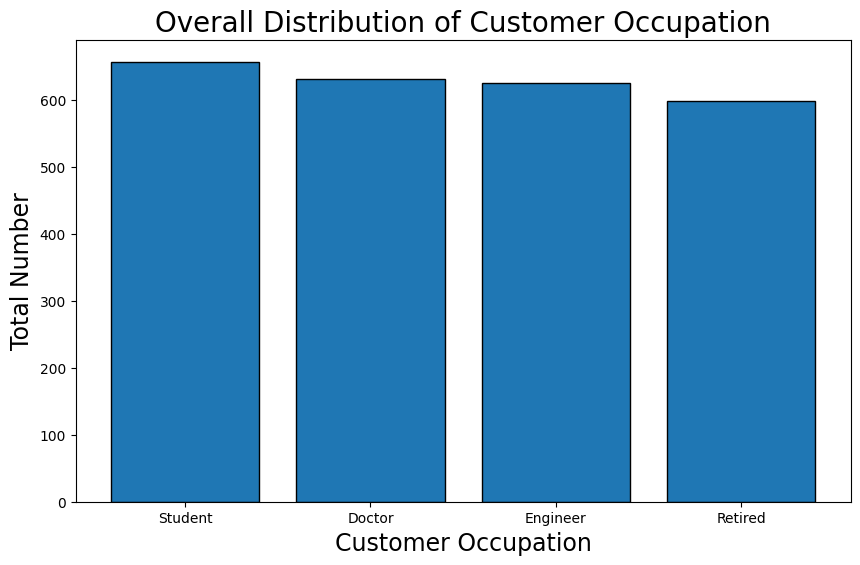

In [ ]:
plt.figure(figsize=(10,6))

plt.bar(customer_occupation_counts.index, customer_occupation_counts.values[:len(customer_occupation_counts)], edgecolor='black')

plt.xlabel('Customer Occupation', fontsize=17)
plt.ylabel('Total Number', fontsize=17)

plt.title('Overall Distribution of Customer Occupation', fontsize=20)

plt.show()

In [ ]:
student_counts = df[df['CustomerOccupation']=='Student']['CustomerOccupation'].count()
doctor_counts = df[df['CustomerOccupation']=='Doctor']['CustomerOccupation'].count()
engineer_counts = df[df['CustomerOccupation']=='Engineer']['CustomerOccupation'].count()
retired_counts = df[df['CustomerOccupation']=='Retired']['CustomerOccupation'].count()

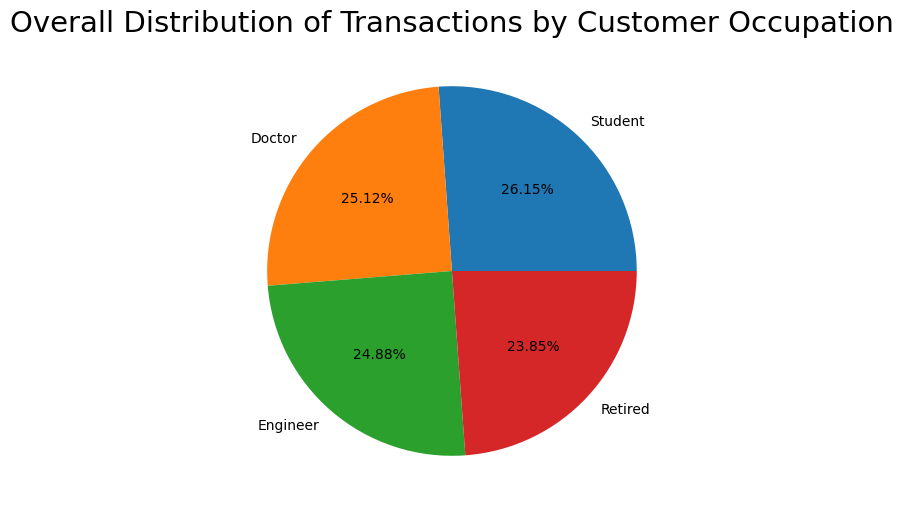

In [ ]:
plt.figure(figsize=(10,6))

index_values = [student_counts, doctor_counts, engineer_counts, retired_counts]
index_labels = ['Student', 'Doctor', 'Engineer', 'Retired']

plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Distribution of Transactions by Customer Occupation', fontsize=21)

plt.show()

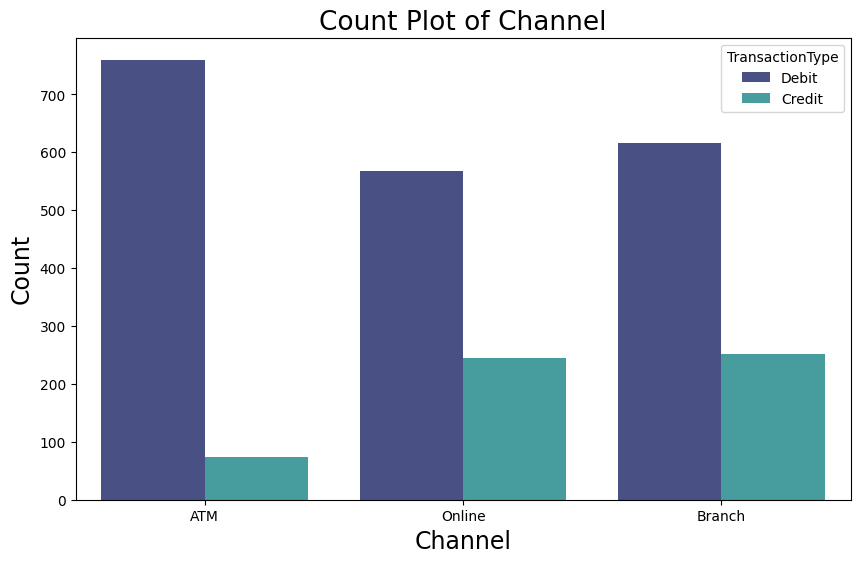

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(data=df, x='Channel', hue='TransactionType', palette='mako')

plt.xlabel('Channel', fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.title('Count Plot of Channel', fontsize=19)

plt.show()

<ipython-input-36-f907455e138c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TransactionType', palette='muted')


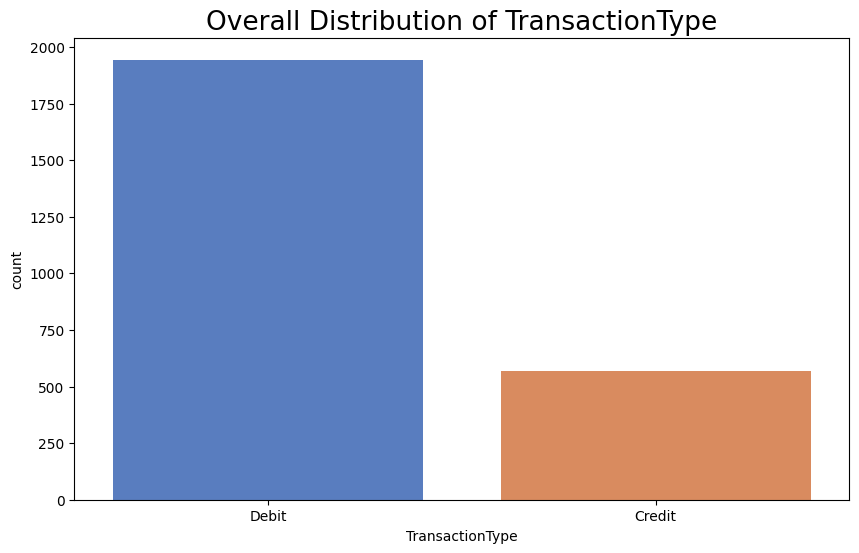

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(data=df, x='TransactionType', palette='muted')

plt.title('Overall Distribution of TransactionType', fontsize=19)

plt.show()

<ipython-input-37-8de3742f8ff2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df['TransactionAmount'], y=df['TransactionType'], palette='plasma')


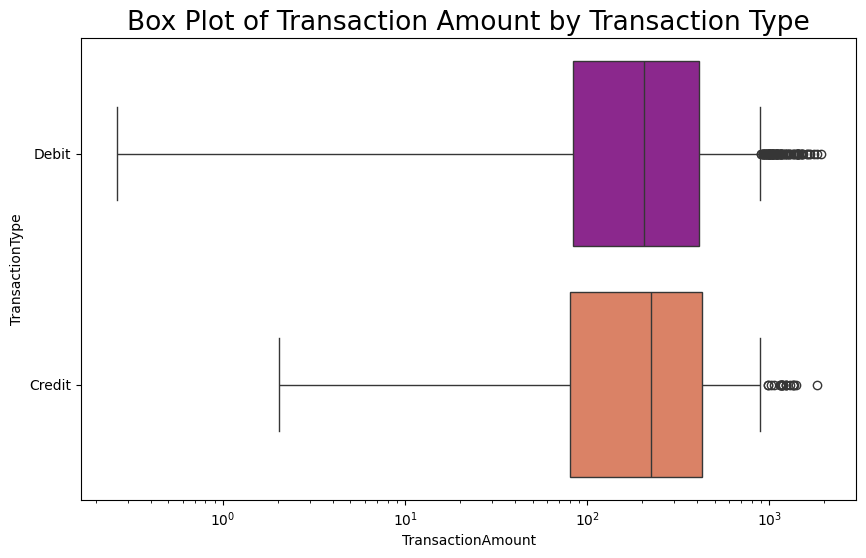

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df, x=df['TransactionAmount'], y=df['TransactionType'], palette='plasma')
plt.xscale('log')
plt.title('Box Plot of Transaction Amount by Transaction Type', fontsize=19)

plt.show()

<ipython-input-38-9c9cb9a300d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AgeGroup', y='TransactionAmount', palette='viridis')


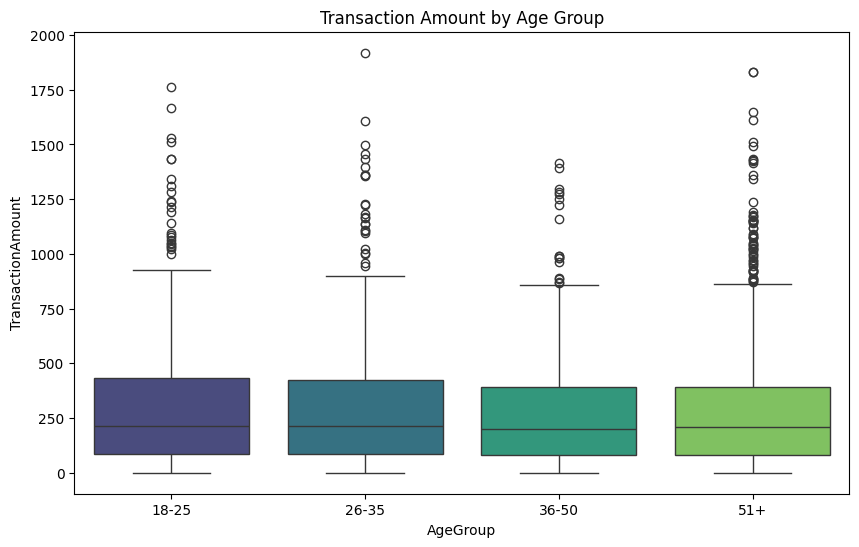

In [ ]:
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=[0,25,35,50,100], labels=['18-25', '26-35', '36-50', '51+'])
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='AgeGroup', y='TransactionAmount', palette='viridis')
plt.title('Transaction Amount by Age Group')
plt.show()

Correlation matrix of numerical variables

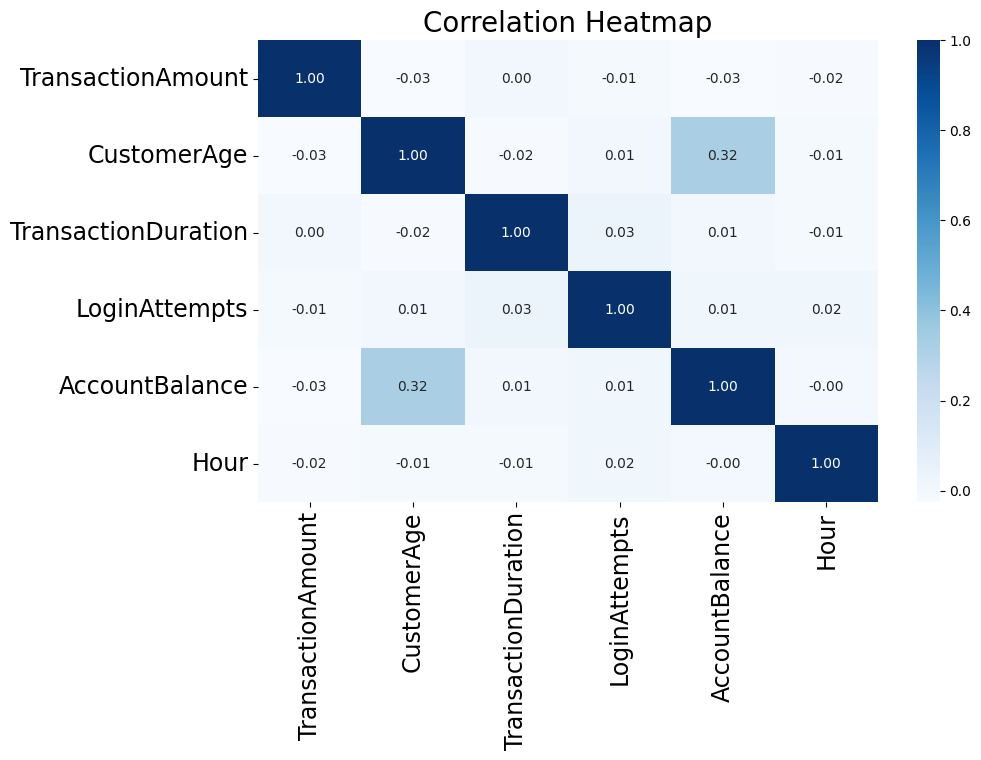

In [ ]:
import numpy as np
plt.figure(figsize=(10,6))
# corr_matrix = df.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'MerchantID', 'PreviousTransactionDate', 'Channel', 'IP Address', 'CustomerOccupation']).corr()

numeric_columns = df.select_dtypes(include=np.number).columns

correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.xticks(rotation=90, fontsize=17)
plt.yticks(fontsize=17)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

Cramers V correlation heatmap for categorical variables

In [ ]:
df_c = df.copy()
df_c = df_c.drop(columns=['TransactionID', 'AccountID', 'DeviceID','MerchantID','IP Address'])

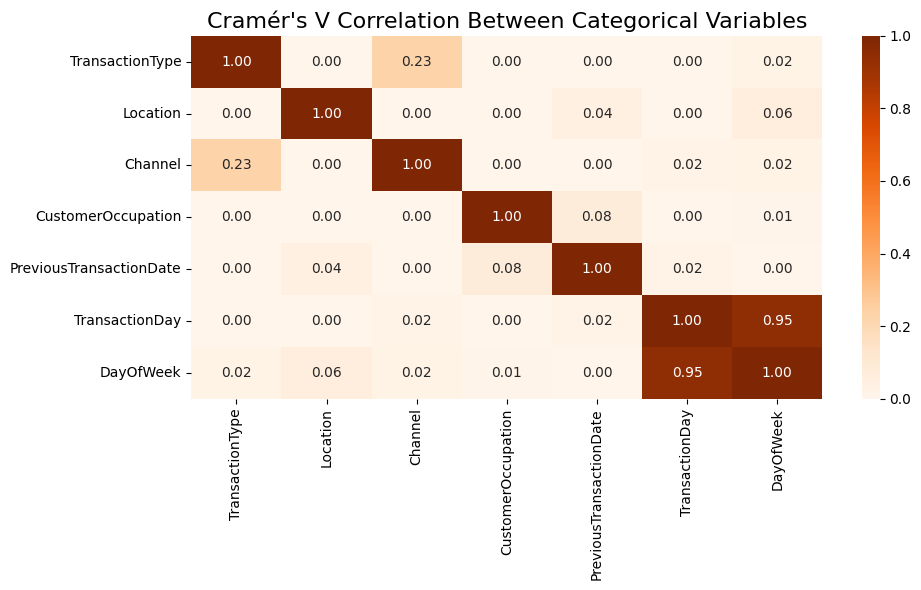

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(confusion_matrix):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_columns = df_c.select_dtypes(include='object').columns

cramers_results = pd.DataFrame(index=cat_columns, columns=cat_columns)

for col1 in cat_columns:
    for col2 in cat_columns:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            confusion_matrix = pd.crosstab(df_c[col1], df_c[col2])
            cramers_results.loc[col1, col2] = cramers_v(confusion_matrix)

cramers_results = cramers_results.astype(float)

plt.figure(figsize=(10, 6))
sns.heatmap(cramers_results, annot=True, cmap='Oranges', fmt='.2f')
plt.title("Cramér's V Correlation Between Categorical Variables", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df_c = df_c.drop(columns=['TransactionDay','PreviousTransactionDate','TransactionDate'])

In [ ]:
df_c.dtypes

,0
TransactionAmount,float64
TransactionType,object
Location,object
Channel,object
CustomerAge,int64
CustomerOccupation,object
TransactionDuration,int64
LoginAttempts,int64
AccountBalance,float64
TransactionDay,object


**Detecting potential fraud**

K Prototypes

In [ ]:
!pip install kmodes

In [ ]:
df_c.dtypes

,0
TransactionAmount,float64
TransactionType,object
Location,object
Channel,object
CustomerAge,int64
CustomerOccupation,object
TransactionDuration,int64
LoginAttempts,int64
AccountBalance,float64
TransactionDay,object


In [49]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

selected_columns = ['TransactionAmount', 'CustomerAge', 'TransactionType', 'Location','Channel','CustomerOccupation','TransactionDuration','LoginAttempts','AccountBalance','DayOfWeek','Hour']
df_kproto = df[selected_columns].copy()

categorical_columns = df_kproto.select_dtypes(include='object').columns

encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_kproto[col] = le.fit_transform(df_kproto[col].astype(str))
    encoders[col] = le

data_matrix = df_kproto.to_numpy()

cat_indices = [df_kproto.columns.get_loc(col) for col in categorical_columns]

kproto = KPrototypes(n_clusters=3, init='Cao', verbose=2, random_state=42)
clusters = kproto.fit_predict(data_matrix, categorical=cat_indices)

df_c['KProto_Cluster'] = clusters

distances = []
for i, row in enumerate(data_matrix):
    cluster_id = clusters[i]
    centroid = kproto.cluster_centroids_
    num_part = np.linalg.norm(row[np.array([i for i in range(len(row)) if i not in cat_indices])].astype(float) -
                              centroid[0][cluster_id].astype(float))
    cat_part = sum(row[cat_indices] != centroid[1][cluster_id])
    distance = num_part + cat_part
    distances.append(distance)

threshold = np.percentile(distances, 95)
df_c['KProto_Potential_Fraud'] = np.array(distances) > threshold

frauds = df_c[df_c['KProto_Potential_Fraud']]
print(f"Number of potential frauds detected by K-Prototypes: {len(frauds)}")

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 522, ncost: 4557309679.96765
Run: 1, iteration: 2/100, moves: 87, ncost: 4498854451.906692
Run: 1, iteration: 3/100, moves: 21, ncost: 4492827674.992998
Run: 1, iteration: 4/100, moves: 8, ncost: 4491632638.20964
Run: 1, iteration: 5/100, moves: 6, ncost: 4490962801.641877
Run: 1, iteration: 6/100, moves: 4, ncost: 4490784512.333016
Run: 1, iteration: 7/100, moves: 1, ncost: 4490772629.915899
Run: 1, iteration: 8/100, moves: 0, ncost: 4490772629.915899
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 490, ncost: 6571299217.256245
Run: 2, iteration: 2/100, moves: 380, ncost: 5185518058.4045315
Run: 2, iteration: 3/100, moves: 209, ncost: 4663044551.4117565
Run: 2, iteration: 4/100, 

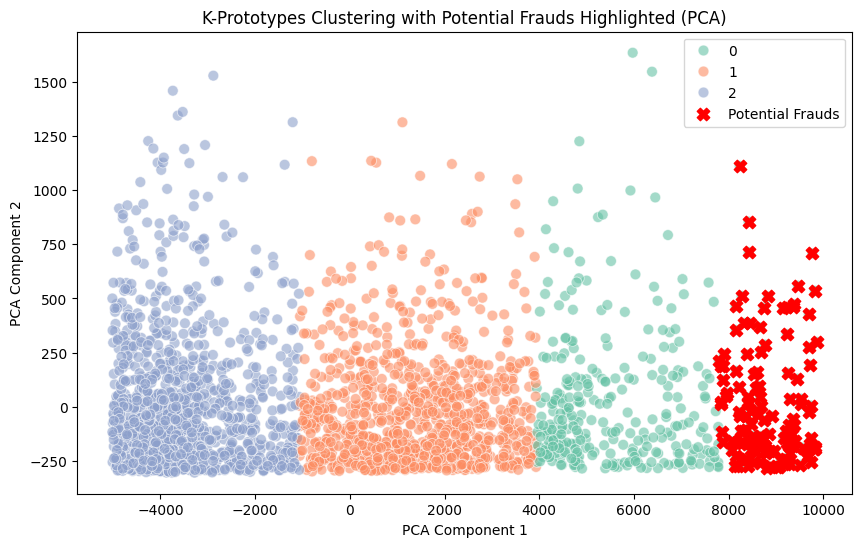

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

combined_data = df_kproto.copy()

pca = PCA(n_components=2)
pca_components = pca.fit_transform(combined_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_c['KProto_Cluster'],
                palette='Set2', alpha=0.6, s=60, legend='full')

fraud_points = df_c['KProto_Potential_Fraud']
plt.scatter(pca_components[fraud_points, 0], pca_components[fraud_points, 1],
            color='red', label='Potential Frauds', marker='X', s=80)

plt.title('K-Prototypes Clustering with Potential Frauds Highlighted (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [51]:
df_c.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DayOfWeek,Hour,AgeGroup,KProto_Cluster,KProto_Potential_Fraud
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,Tuesday,16,51+,1,False
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,Tuesday,16,51+,0,True
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,Monday,18,18-25,2,False
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,Friday,16,26-35,1,False
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,Monday,17,26-35,1,False


In [52]:
df_c = df_c.drop(columns=['KProto_Cluster'])

In [53]:
df_c['KProto_Potential_Fraud'].value_counts()

,count
KProto_Potential_Fraud,
False,2386
True,126


**Classification Model**

Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df_c['KProto_Potential_Fraud'] = df_c['KProto_Potential_Fraud'].astype(int)

X = df_c.drop(columns=['KProto_Potential_Fraud'])
y = df_c['KProto_Potential_Fraud']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[479   1]
 [  0  23]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       0.96      1.00      0.98        23

    accuracy                           1.00       503
   macro avg       0.98      1.00      0.99       503
weighted avg       1.00      1.00      1.00       503



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Train set size: 2009
Test set size: 503


Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[480   0]
 [  0  23]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       1.00      1.00      1.00        23

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



XGBoost

In [57]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[480   0]
 [  0  23]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       1.00      1.00      1.00        23

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:30:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


SVM

In [58]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[479   1]
 [ 23   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       480
           1       0.00      0.00      0.00        23

    accuracy                           0.95       503
   macro avg       0.48      0.50      0.49       503
weighted avg       0.91      0.95      0.93       503



In [59]:
df_c.shape

(2512, 13)

In [60]:
df_c.to_csv('/content/drive/MyDrive/ML Practice/Unsupervised project/fraud_dataset.csv', index=False)


Parameter Tuning

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [62]:
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 251}


In [63]:
from sklearn.ensemble import RandomForestClassifier

best_params = {
    'n_estimators': 154,
    'max_depth': 19,
    'min_samples_split': 5,
    'min_samples_leaf': 3,
    'max_features': 'sqrt'
}

final_rf = RandomForestClassifier(
    **best_params,
    random_state=42
)

final_rf.fit(X_train, y_train)

y_pred = final_rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       1.00      1.00      1.00        23

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


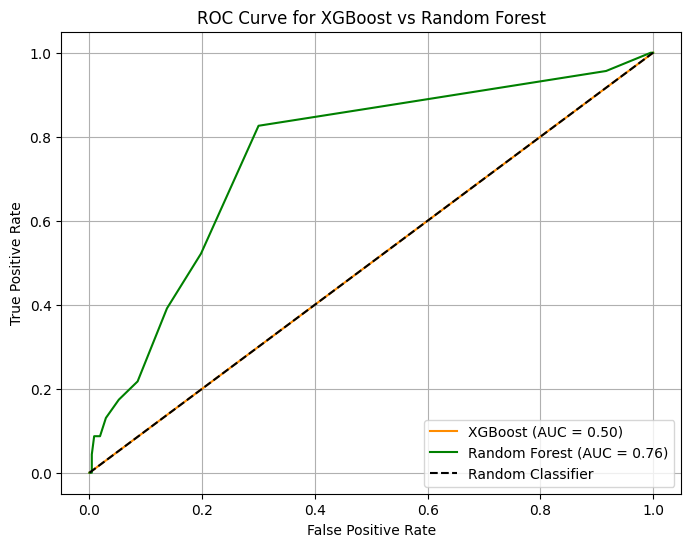

In [64]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', color='darkorange')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost vs Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
X.columns

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'Hour', 'TransactionType_Debit',
       'Location_Atlanta', 'Location_Austin', 'Location_Baltimore',
       ...
       'TransactionDay_2023-12-28', 'TransactionDay_2023-12-29',
       'TransactionDay_2024-01-01', 'DayOfWeek_Monday', 'DayOfWeek_Thursday',
       'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'AgeGroup_26-35',
       'AgeGroup_36-50', 'AgeGroup_51+'],
      dtype='object', length=321)

In [ ]:
pip install shap

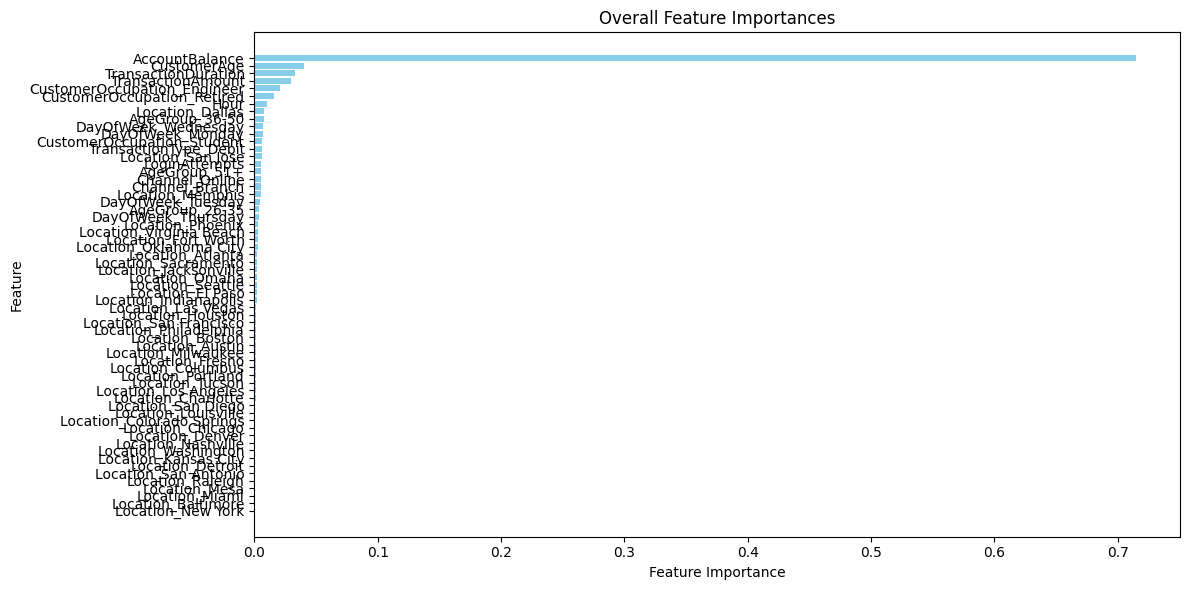

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_imp_df['feature'], feature_imp_df['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Overall Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

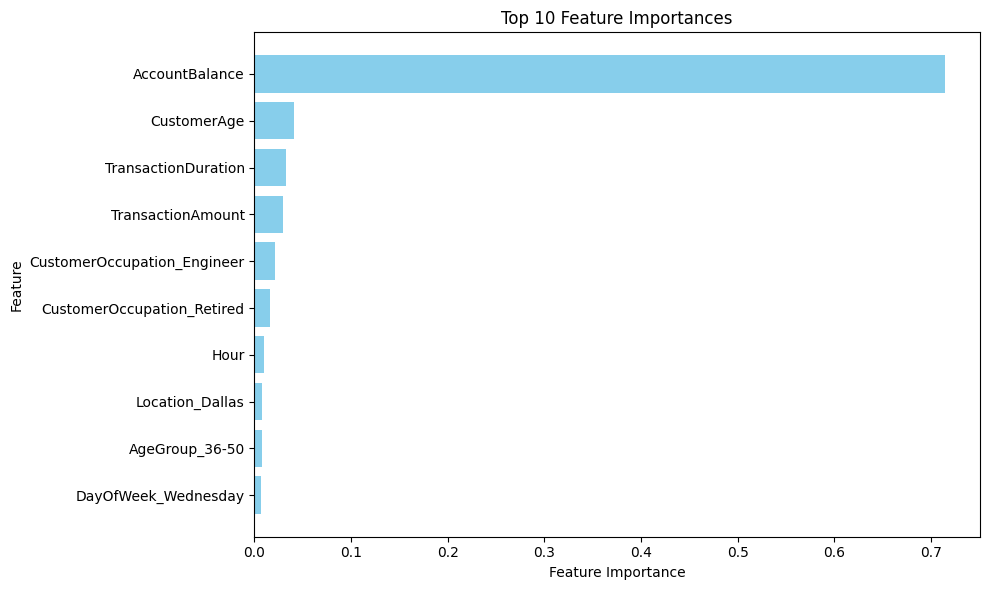

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_

feature_names = X.columns

feature_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

top_10_features = feature_imp_df.sort_values(by='importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['feature'], top_10_features['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [89]:
import numpy as np

X_test = pd.DataFrame(X_test, columns=feature_names)

explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(X_test)

shap_values_class_1 = shap_values[:, :, 1]
shap_values_class_0 = shap_values[:, :, 0]

mean_shap_values_class_1 = np.abs(shap_values_class_1).mean(axis=0)
mean_shap_values_class_0 = np.abs(shap_values_class_0).mean(axis=0)

top_10_features_idx_class_1 = np.argsort(mean_shap_values_class_1)[-10:]
top_10_features_idx_class_0 = np.argsort(mean_shap_values_class_0)[-10:]

X_test_top10_class_1 = X_test.iloc[:, top_10_features_idx_class_1]
X_test_top10_class_0 = X_test.iloc[:, top_10_features_idx_class_0]

shap_values_top10_class_1 = shap_values_class_1[:, top_10_features_idx_class_1]
shap_values_top10_class_0 = shap_values_class_0[:, top_10_features_idx_class_0]

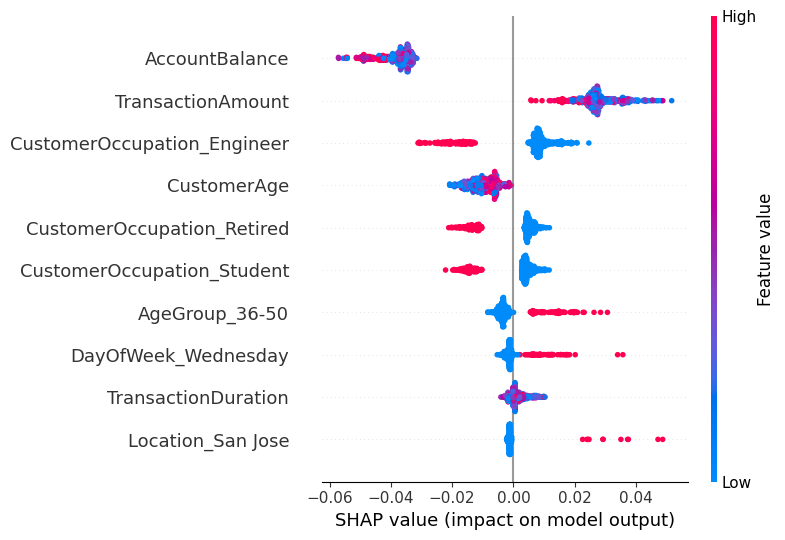

In [90]:
shap.summary_plot(shap_values_top10_class_1, X_test_top10_class_1)